## Import

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Read Data

In [2]:
# 구매 데이터 읽기
purchase = pd.read_csv('../data/DC_구매내역정보.csv', parse_dates=['구매일','구매일자'], encoding='cp949')
print('데이터 크기:', purchase.shape)

데이터 크기: (101325, 11)


In [3]:
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일,증정상품
33106,545854597,식품,가공식품,경기 수원시,2014-12-12 14:00:00,14,1,7000,0,2014-12-12,0
61923,647610673,의류잡화,여성용의류-고급의류,서울 중구,2014-09-19 16:00:00,16,1,1048000,0,2014-09-19,0
92621,348197478,생활잡화,생활용품,서울 강북구,2014-03-07 19:00:00,19,1,6000,0,2014-03-07,0
4998,666560308,레포츠,스포츠용품/의류,서울 동대문구,2014-09-15 11:00:00,11,1,106000,0,2014-09-15,0
855,679463978,의류잡화,남성용의류-정장류,서울 송파구,2014-01-19 10:00:00,10,-1,-435000,1,2014-01-19,0


## 매장 유형 파악
`질문` 구매 지역마다 판매하는 상품대분류명을 보면 가전제품&생활잡화, 두 상품군 외 다른 상품군까지로 나뉘어지는데 매장 유형이 다른 걸까?
- 롯데 계열사 데이터로 자료조사를 해보았을 때 가전제품&생활잡화만 판매하는 곳은 `롯데 하이마트`, 다른 곳은 `롯데백화점`임을 알아내었다.<br>
  [하이마트 지점 안내] https://company.himart.co.kr/store/search

In [4]:
purchase.groupby('구매지역')['상품대분류명'].unique()

구매지역
경기 고양시     [생활잡화, 식품, 의류잡화, 가전제품, 레포츠, 가구, 명품]
경기 광명시     [의류잡화, 레포츠, 식품, 가전제품, 명품, 가구, 생활잡화]
경기 광주시                                  [가전제품]
경기 구리시     [의류잡화, 생활잡화, 식품, 레포츠, 가전제품, 가구, 명품]
경기 군포시                                  [가전제품]
                          ...                 
서울 영등포구    [의류잡화, 가전제품, 식품, 레포츠, 생활잡화, 가구, 명품]
서울 용산구                            [가전제품, 생활잡화]
서울 은평구                            [가전제품, 생활잡화]
서울 중구      [레포츠, 의류잡화, 식품, 명품, 가전제품, 생활잡화, 가구]
서울 중랑구                                  [가전제품]
Name: 상품대분류명, Length: 65, dtype: object

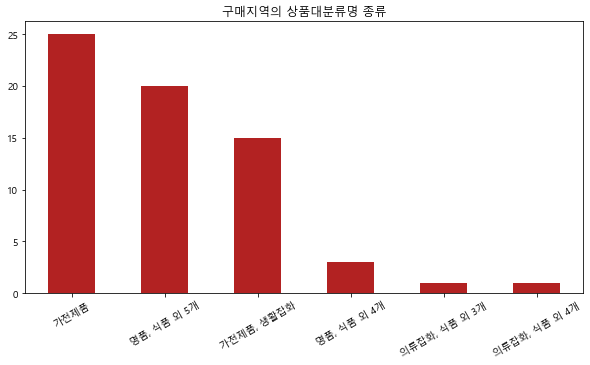

In [5]:
ease = purchase.groupby('구매지역')['상품대분류명'].unique().apply(lambda x: sorted(x)).value_counts()
ease.index = ['가전제품','명품, 식품 외 5개', '가전제품, 생활잡화','명품, 식품 외 4개','의류잡화, 식품 외 3개','의류잡화, 식품 외 4개']
ease.plot.bar(title="구매지역의 상품대분류명 종류", rot=30, figsize=(10,5),color='firebrick')
plt.show()

In [6]:
# 하이마트 지점 안내와 구글맵(상봉점 존재, 서대문구X) 상으론 서울의 23개 구에 존재한다.
purchase.loc[purchase.구매지역.str.contains('서울')].groupby('구매지역')['상품대분류명'].unique()

구매지역
서울 강남구     [가전제품, 식품, 의류잡화, 명품, 생활잡화, 레포츠, 가구]
서울 강동구                            [가전제품, 생활잡화]
서울 강북구     [가전제품, 의류잡화, 식품, 레포츠, 생활잡화, 명품, 가구]
서울 강서구         [레포츠, 가전제품, 식품, 의류잡화, 생활잡화, 가구]
서울 관악구     [레포츠, 생활잡화, 식품, 가구, 가전제품, 의류잡화, 명품]
서울 광진구         [생활잡화, 의류잡화, 식품, 가전제품, 레포츠, 명품]
서울 구로구                            [가전제품, 생활잡화]
서울 금천구                                  [가전제품]
서울 노원구     [식품, 생활잡화, 의류잡화, 가전제품, 레포츠, 가구, 명품]
서울 도봉구                            [가전제품, 생활잡화]
서울 동대문구    [의류잡화, 가전제품, 식품, 레포츠, 생활잡화, 가구, 명품]
서울 동작구                            [가전제품, 생활잡화]
서울 마포구                            [가전제품, 생활잡화]
서울 서대문구                                 [가전제품]
서울 서초구                                  [가전제품]
서울 성동구                                  [가전제품]
서울 성북구                                  [가전제품]
서울 송파구     [생활잡화, 의류잡화, 식품, 가전제품, 가구, 레포츠, 명품]
서울 양천구                            [가전제품, 생활잡화]
서울 영등포구    [의류잡화, 가전제품, 식품, 레포츠, 생활잡화, 가구, 명품]
서울 용산구                            [가전제품, 생활잡화]
서울 은평구  

`질문` 백화점에서도 가전잡화, 생활잡화를 구매할 수 있는데 어떻게 매장 유형 Label을 생성하는 게 좋을까?
- 거래내역의 대부분이 백화점에서 이루어졌다고 볼 수 있다. 
- 거래가 많이 이루어진 백화점에서, 매장이 많은 하이마트에서 할 법한 전략을 제안하기 위해선 보수적이게 Label을 생성하는 게 좋다.
- `거래`별로 묶고 가전제품, 생활잡화 외의 상품이 판매되었으면 백화점으로, 아니면 하이마트로 판단한다.

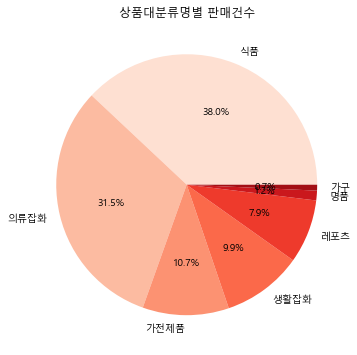

In [7]:
plt.figure(figsize=(6,6))
purchase.상품대분류명.value_counts().plot.pie(title="상품대분류명별 판매건수", colors=sns.color_palette("Reds",7), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

`질문` 거래는 어떻게 정의해야 할까?
- 백화점에서 구매활동은 매장별로 이루어져 동일한 백화점을 이용한 경우에도 구매시간이 다르게 나온다.
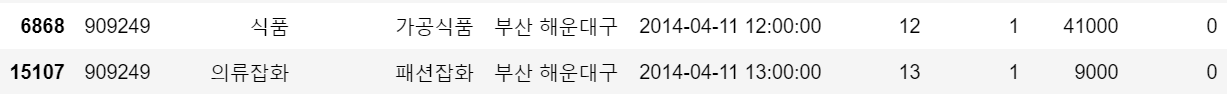
- 한 거래로, 고객의구매여정이라 판단할 수 있는 시간간격은<br>
  https://brunch.co.kr/@logibridge/376?utm_source=oneoneone와 구매시간간격 분포에 따라 `6시간`으로 한다.

In [8]:
# [DC] 고객의 다음 구매까지 걸리는 시간을 구하기 위해 정렬, index 초기화를 진행한다.
purchase = purchase.sort_values(by=['ID','구매일','구매지역','구매시간']).reset_index(drop=True)
purchase

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일,증정상품
0,741463,의류잡화,남성용의류-캐주얼,서울 동대문구,2014-01-15 13:00:00,13,1,44000,0,2014-01-15,0
1,741463,레포츠,스포츠용품/의류,서울 동대문구,2014-02-08 15:00:00,15,1,124000,0,2014-02-08,0
2,741463,식품,건강식품,서울 동대문구,2014-02-21 11:00:00,11,1,98000,0,2014-02-21,0
3,741463,레포츠,스포츠용품/의류,서울 동대문구,2014-03-05 14:00:00,14,1,36000,0,2014-03-05,0
4,741463,레포츠,스포츠용품/의류,서울 동대문구,2014-03-05 17:00:00,17,1,27000,0,2014-03-05,0
...,...,...,...,...,...,...,...,...,...,...,...
101320,999375162,식품,음료,서울 강남구,2014-12-21 13:00:00,13,1,5000,0,2014-12-21,0
101321,999494396,의류잡화,여성용의류-SPA,서울 송파구,2014-06-26 11:00:00,11,1,27000,0,2014-06-26,0
101322,999494396,의류잡화,여성용의류-SPA,서울 송파구,2014-06-27 15:00:00,15,-1,-26000,1,2014-06-27,0
101323,999494396,의류잡화,여성용의류-SPA,서울 송파구,2014-06-27 15:00:00,15,1,18000,0,2014-06-27,0


In [9]:
# 시간간격, 구매지역 구분을 위해 label encoding과 diff를 구한다.
ease = purchase[['ID','구매일자','구매지역']].copy()
ease['구매간격'] = ease.groupby('ID')['구매일자'].diff().astype('timedelta64[h]').fillna(100000)
ease['구매지역_label'] = LabelEncoder().fit_transform(ease['구매지역'])
ease['구매지역_label'] = ease['구매지역_label'].diff()
display(ease.head())

,ID,구매일자,구매지역,구매간격,구매지역_label
0,741463,2014-01-15 13:00:00,서울 동대문구,100000.0,NaN
1,741463,2014-02-08 15:00:00,서울 동대문구,578.0,0.0
2,741463,2014-02-21 11:00:00,서울 동대문구,308.0,0.0
3,741463,2014-03-05 14:00:00,서울 동대문구,291.0,0.0
4,741463,2014-03-05 17:00:00,서울 동대문구,3.0,0.0


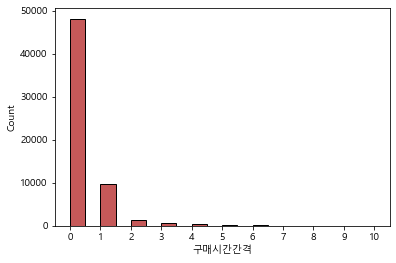

In [10]:
# 롯데백화점, 하이마트 모두 10시부터 20시까지 운영하기에 한 거래의 구매시간간격은 10 이하여야 한다.
# 분포를 보고 6시간까지를 한 거래로 판단한다.
sns.histplot(ease.query('0 <= 구매간격 <= 10')['구매간격'], bins=20, color='firebrick')
plt.xticks(range(11))
plt.xlabel('구매시간간격')
plt.show()

In [11]:
# [DC] 거래별 ID를 생성한다.
tranid = []

i = 0
for _, HOURS, SHOP in ease[['구매간격','구매지역_label']].itertuples():
    # 7시간 이후 거래이거나 다른 고객이거나 7시간 이내에 이루어졌으나 다른 점포에서 거래한 경우
    if (HOURS > 7) or (HOURS == 100000) or (HOURS <= 7 and SHOP != 0):
        i += 1
    tranid.append(i)

# 40858개 거래로 구분했다.
purchase['거래ID'] = tranid
print(purchase.거래ID.nunique())

40858


In [12]:
# [DC] 거래당 상품대분류명 구성에 따라 백화점과 하이마트로 구분한다.
ease = purchase.groupby('거래ID')['상품대분류명'].unique().apply(lambda x: len(set(x)-{'가전제품','생활잡화'}))\
       .apply(lambda x: '백화점' if x != 0 else '하이마트').rename('매장ID')
purchase = purchase.merge(ease.reset_index(), on='거래ID')
display(purchase.sample(5))

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부,구매일,증정상품,거래ID,매장ID
21430,220494115,식품,가공식품,서울 송파구,2014-06-10 18:00:00,18,1,9000,0,2014-06-10,0,8788,백화점
17431,169807083,의류잡화,여성용의류-SPA,서울 강남구,2014-11-26 13:00:00,13,1,80000,0,2014-11-26,0,7058,백화점
95410,953876908,식품,농산물,경기 안양시,2014-06-06 16:00:00,16,1,9000,0,2014-06-06,0,38369,백화점
48514,487482414,식품,음료,서울 영등포구,2014-03-31 15:00:00,15,1,9000,0,2014-03-31,0,19620,백화점
8597,70179563,의류잡화,여성용의류-정장류,서울 동대문구,2014-05-01 14:00:00,14,-1,-308000,1,2014-05-01,0,3368,백화점


## 매장별 구매 특성
- 대부분의 거래는 백화점에서 일어났으며 백화점은 구매가 자주 일어나고 가격대가 높은 의류잡화를 적극 판매하거나<br>
  파레토 법칙에 따라 소수의 대주주가 관심있는 가구, 명품의 상품 진열에 신경써야 한다.
- 하이마트는 가전제품을 사려할 때 방문하며 전자제품으로 가격대가 높다.

In [13]:
pd.pivot_table(purchase, index='상품대분류명', columns='매장ID', values='거래ID', aggfunc=pd.Series.nunique)

매장ID,백화점,하이마트
상품대분류명,,
가구,584.0,NaN
가전제품,1530.0,5788.0
레포츠,4613.0,NaN
명품,824.0,NaN
생활잡화,3484.0,2560.0
식품,17797.0,NaN
의류잡화,16174.0,NaN


In [14]:
pd.pivot_table(purchase, index='상품대분류명', columns='매장ID', values='구매금액', aggfunc=np.mean)

매장ID,백화점,하이마트
상품대분류명,,
가구,223067.031464,NaN
가전제품,66724.950100,287071.205572
레포츠,85329.251531,NaN
명품,369325.714286,NaN
생활잡화,54958.938831,73623.195380
식품,13921.049214,NaN
의류잡화,84792.044814,NaN


## Save data

In [15]:
# [DC] 불필요한 구매일, 구매시간 열은 제거한다.
purchase.drop(['구매일', '구매시간'], axis=1, inplace=True)
purchase

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매수량,구매금액,취소여부,증정상품,거래ID,매장ID
0,741463,의류잡화,남성용의류-캐주얼,서울 동대문구,2014-01-15 13:00:00,1,44000,0,0,1,백화점
1,741463,레포츠,스포츠용품/의류,서울 동대문구,2014-02-08 15:00:00,1,124000,0,0,2,백화점
2,741463,식품,건강식품,서울 동대문구,2014-02-21 11:00:00,1,98000,0,0,3,백화점
3,741463,레포츠,스포츠용품/의류,서울 동대문구,2014-03-05 14:00:00,1,36000,0,0,4,백화점
4,741463,레포츠,스포츠용품/의류,서울 동대문구,2014-03-05 17:00:00,1,27000,0,0,4,백화점
...,...,...,...,...,...,...,...,...,...,...,...
101320,999375162,식품,음료,서울 강남구,2014-12-21 13:00:00,1,5000,0,0,40855,백화점
101321,999494396,의류잡화,여성용의류-SPA,서울 송파구,2014-06-26 11:00:00,1,27000,0,0,40856,백화점
101322,999494396,의류잡화,여성용의류-SPA,서울 송파구,2014-06-27 15:00:00,-1,-26000,1,0,40857,백화점
101323,999494396,의류잡화,여성용의류-SPA,서울 송파구,2014-06-27 15:00:00,1,18000,0,0,40857,백화점


In [16]:
purchase.to_csv('../data/DC_구매내역정보.csv', index=False, encoding='cp949')